# LiDAR Uncertainty at two NEON Field Sites

Systematic and random error may both occur in tree height data as measured on the ground (or *in situ*) by humans, or through LiDAR measurements. This notebook loads and plots tree height data for comparison between *in situ* and LiDAR estimated data sets from two National Ecological Observatory Network (NEON) Field Sites in California, United States.

### Soaproot Saddle (SOAP) Field Site
![Soaproot Saddle Field Site](img/Soaproot_pano.jpeg)
Image Credit: National Ecological Oberservatory Network, https://www.neonscience.org/field-sites/soap

### San Joaquin Experimental Range (SJER) Field Site 
![SJER Field Site](img/SJER_pano.jpeg)
Image Credit: National Ecological Observatory Network, https://www.neonscience.org/field-sites/sjer

In [1]:
# Import libraries
import os
import pathlib

import earthpy as et
import matplotlib.pyplot as plt
import seaborn as sns

from dataloaders import NEONDataLoader

# Get lidar data
et.data.get_data('spatial-vector-lidar')

# Set working directory
working_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'spatial-vector-lidar')

# Check working directory exists, create directory if does not exist
if not os.path.exists(working_dir):
    print('Path does not exist. Creating...')
    os.makedirs(working_dir)
os.chdir(working_dir)

# Check working directory path is correct
print(working_dir)


/Users/jen/earth-analytics/data/spatial-vector-lidar


In [2]:
class SJERDataLoader(NEONDataLoader):
    """Loads NEON SJER data into geoDataFrame"""

    site_name = 'SJER'
    id_col_name = 'Plot_ID'
    formatting_dict = {'separator': '_', 'plot': '_plot'}

sjer_data_loader = SJERDataLoader()
sjer_gdf = sjer_data_loader.height_stats
sjer_gdf

,geometry,Plot_ID,Point,northing,easting,plot_type,lidar_max,lidar_mean,insitu_max,insitu_mean
0,"POLYGON ((255872.376 4111567.818, 255872.280 4...",SJER1068,center,4111567.818,255852.376,trees,19.049999,11.544347,19.3,3.866667
1,"POLYGON ((257426.967 4111298.971, 257426.871 4...",SJER112,center,4111298.971,257406.967,trees,24.019999,10.369277,23.9,8.221429
2,"POLYGON ((256858.760 4110819.876, 256858.664 4...",SJER116,center,4110819.876,256838.760,grass,16.070000,7.518398,16.0,8.218750
3,"POLYGON ((256196.947 4108752.026, 256196.851 4...",SJER117,center,4108752.026,256176.947,trees,11.059999,7.675346,11.0,6.512500
4,"POLYGON ((255988.372 4110476.079, 255988.276 4...",SJER120,center,4110476.079,255968.372,grass,5.740000,4.591177,8.8,7.600000
5,"POLYGON ((257098.867 4111388.570, 257098.771 4...",SJER128,center,4111388.570,257078.867,trees,19.139999,8.987087,18.2,5.211765
6,"POLYGON ((256703.434 4111071.087, 256703.338 4...",SJER192,center,4111071.087,256683.434,grass,16.549999,7.229096,13.7,6.769565
7,"POLYGON ((256737.467 4112167.778, 256737.371 4...",SJER272,center,4112167.778,256717.467,trees,11.840000,7.107061,12.4,6.819048
8,"POLYGON ((256054.390 4111533.879, 256054.294 4...",SJER2796,center,4111533.879,256034.390,soil,20.279999,6.409630,9.4,5.085714
9,"POLYGON ((258517.102 4109856.983, 258517.006 4...",SJER3239,center,4109856.983,258497.102,soil,12.910000,6.009128,17.9,3.920833


In [3]:
class SOAPDataLoader(NEONDataLoader):
    """Loads NEON SOAP site data into geoDataFrame"""

    site_name = 'SOAP'
    id_col_name = 'ID'
    formatting_dict = {'separator': '-', 'plot': ''}

    def id_mod(self, id):
        """ Adds site name to plot number in ID column."""

        return 'SOAP' + str(id)

soap_data_loader = SOAPDataLoader()
soap_gdf = soap_data_loader.height_stats
soap_gdf

,geometry,OBJECTID,ID,plotType,subtype,plotDimens,Protocols,lidar_max,lidar_mean,insitu_max,insitu_mean
1,"POLYGON ((297065.197 4100713.028, 297065.101 4...",2,SOAP43,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",54.099998,19.804080,51.1,5.047000
2,"POLYGON ((299825.197 4101013.028, 299825.101 4...",3,SOAP63,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",32.480000,16.989834,33.0,9.232787
4,"POLYGON ((298715.197 4100833.028, 298715.101 4...",5,SOAP95,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",33.869999,17.412048,28.1,6.050943
5,"POLYGON ((297065.197 4100083.028, 297065.101 4...",6,SOAP139,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",49.919998,19.417840,120.0,4.745902
6,"POLYGON ((299885.197 4100413.028, 299885.101 4...",7,SOAP143,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",27.340000,10.454653,19.7,2.530702
7,"POLYGON ((297545.197 4100533.028, 297545.101 4...",8,SOAP187,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",47.959999,13.221389,134.0,4.878947
9,"POLYGON ((297515.197 4100683.028, 297515.101 4...",10,SOAP299,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",34.189999,18.852112,33.1,13.896154
10,"POLYGON ((297065.197 4100593.028, 297065.101 4...",11,SOAP331,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",45.500000,18.149803,39.2,5.009848
22,"POLYGON ((299315.197 4101463.028, 299315.101 4...",23,SOAP223,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",13.469999,6.155488,8.2,2.444186
23,"POLYGON ((297785.197 4101193.028, 297785.101 4...",24,SOAP283,distributed,base,40.0,"beetles, soils, coarse-downed wood, leaf area ...",19.369999,5.781789,13.8,3.328571


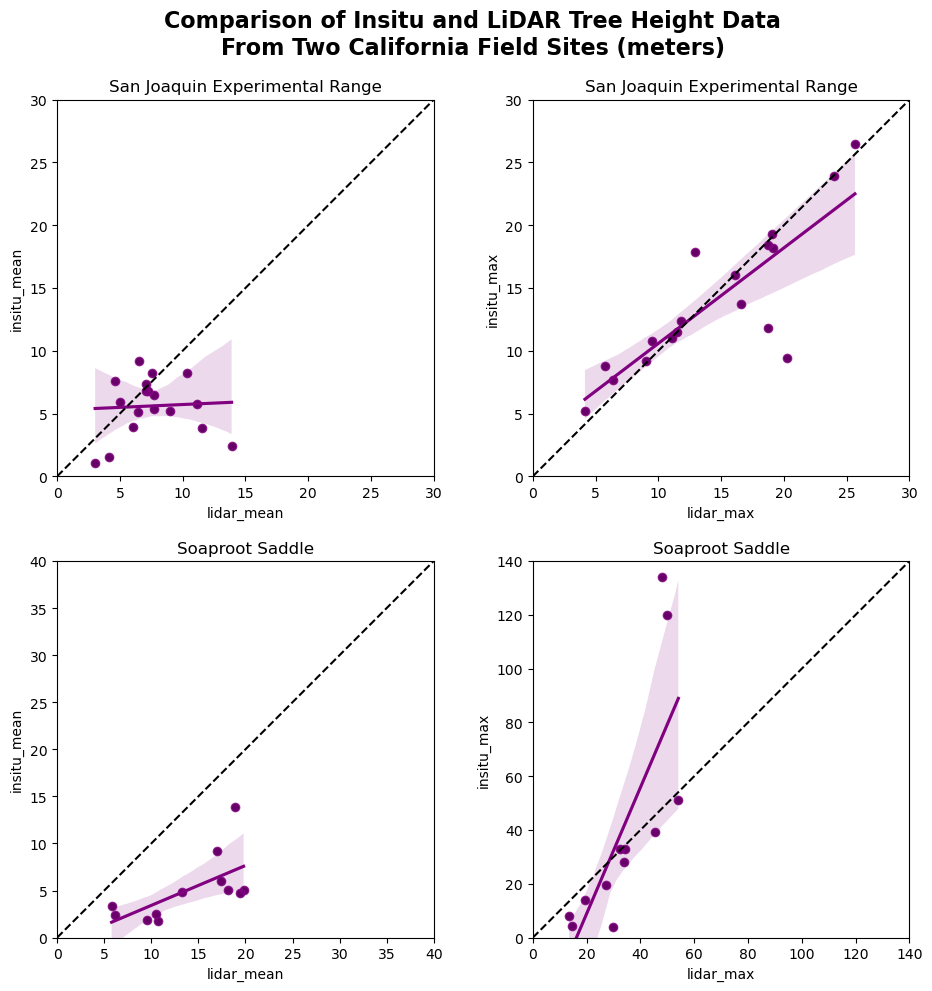

In [4]:
def plot_height_stats(height_stats_gdf, axs, site, upper_lim, aggr):
    """
    Plot of Insitu and LiDAR tree height max and means.
    ----------
    Parameters:
    height_stats_gdf: GeoPandasDataFrame
        GeoPandasDataFrame with LiDAR and insitu tree height statistics.

    axs: figure ax
        Ax figure to add to plot.

    site: str
        Site Name.

    upper_lim: int
        Upper x and y limits for plot axis.

    aggr: str
        Aggregation statistic to plot (mean or max)
    -------
    Returns:
    plot_height_stats: Plot of tree height statistics.
    """
    # Set limits and aspect of plot
    axs.set(xlim=(0, upper_lim), ylim=(0, upper_lim), aspect='equal')

    # Define plot type and columns to plot
    sns.scatterplot(
        x='lidar_{aggr}'.format(aggr=aggr),
        y='insitu_{aggr}'.format(aggr=aggr),
        data=height_stats_gdf, color='black',ax=axs)

    # Plot regression
    sns.regplot(
        x='lidar_{aggr}'.format(aggr=aggr),
        y='insitu_{aggr}'.format(aggr=aggr),
        data=height_stats_gdf, color='purple', ax=axs)

    # Set plot title labels
    axs.set_title(site)

    # Plot 1:1 line
    axs.plot(
        (0, 1), (0, 1),
        transform=axs.transAxes,
        ls='--', c='k')
    return plot_height_stats

# Plot Insitu vs LiDAR Tree Height Data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle(
    'Comparison of Insitu and LiDAR Tree Height Data\n'
    'From Two California Field Sites (meters)',
    fontweight='bold',
    fontsize=16)
plt.tight_layout(pad=2, h_pad=4, w_pad=0.5)

plot_height_stats(sjer_gdf, ax1, 'San Joaquin Experimental Range', 30, 'mean')
plot_height_stats(sjer_gdf, ax2, 'San Joaquin Experimental Range', 30, 'max')
plot_height_stats(soap_gdf, ax3, 'Soaproot Saddle', 40, 'mean')
plot_height_stats(soap_gdf, ax4, 'Soaproot Saddle', 140, 'max')

plt.show()